### Instruções

#### EXERCÍCIO 1: Treinar uma árvore de decisão para classificar o conjunto de dados “moons”​ contendo 10.000 amostras

Dividir o conjunto entre treinamento e teste​
Encontrar bons valores de hiperparâmetros para o classificador, utilizando a classe GridSearchCV
Exemplo de criação de dados para o conjunto "moons" pode ser consultado no slide 13 da Aula de SVM (aula 2). (make_moons(n_samples=10000, noise=0.4)

#### EXERCÍCIO 2: Criar uma floresta, com base no exercício anterior:​
Gerar mil subconjuntos do conjunto de treinamento, cada um contendo 100 instâncias selecionadas aleatoriamente. (Dica: usar a classe ShuffleSplit da Scikit-Learn.)​
Treinar uma árvore de decisão em cada subconjunto, usando os melhores valores de hiperparâmetros encontrados no exercício anterior.​
Para cada instância do conjunto de testes, gere as predições das mil árvores de decisão e mantenha somente as predições mais frequentes (Dica, usar a função mode() do SciPy). Essa abordagem fornece as predições dos votos majoritários em relação ao conjunto de testes.​
Avalie essas predições no conjunto de testes: você deve obter uma acurácia um pouco maior do que a do seu primeiro modelo (cerca de 0,5 a 1,5% maior).

### 🌙 Exercício 1: Árvore de Decisão com ```make_moons```

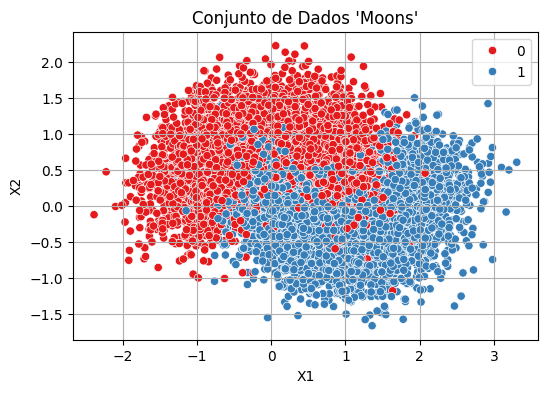

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Gerar os dados "moons"
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Visualizar os dados
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="Set1")
plt.title("Conjunto de Dados 'Moons'")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


### 🔎 Separar treino e teste + GridSearchCV

In [2]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid de hiperparâmetros para DecisionTree
param_grid = {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Acurácia no conjunto de teste:", accuracy_score(y_test, grid_search.predict(X_test)))


Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia no conjunto de teste: 0.863


### 🌲 Exercício 2: Floresta com Subconjuntos Aleatórios

In [3]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode

# Criar 1000 subconjuntos com ShuffleSplit
ss = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)
tree_preds = []

# Treinar uma árvore por subconjunto
for train_idx, _ in ss.split(X_train):
    X_subset = X_train[train_idx]
    y_subset = y_train[train_idx]
    
    tree = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
    tree.fit(X_subset, y_subset)
    pred = tree.predict(X_test)
    tree_preds.append(pred)

# Converter para array e aplicar votação majoritária
tree_preds = np.array(tree_preds)
final_preds, _ = mode(tree_preds, axis=0, keepdims=False)

# Avaliação
acc = accuracy_score(y_test, final_preds)
print("Acurácia da floresta com votação majoritária:", acc)
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, final_preds))


Acurácia da floresta com votação majoritária: 0.869

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1013
           1       0.86      0.87      0.87       987

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

